### Problem Statement :

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of 
backward countries.After the recent funding programmes, they have been able to raise around $ 10 million

The CEO of the NGO needs to decide how to use this money strategically and effectively by choosing the countries that are
in the direst need of aid. 

### Business Goal :

The given data needs to be analysed such that the countries are categorised based on some socio-economic and health factors 
that determine the overall development of the country

### Step 1: Reading and Understanding the Data

Let us first import NumPy, Pandas, matplotlib, seaborn, sklearn and scipy libraries needed for this analysis and read the dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data

from sklearn.preprocessing import scale

# To perform KMeans clustering

from sklearn.cluster import KMeans

# To perform Hierarchical clustering

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
# Importing datasets

country_data = pd.read_csv("Country-data.csv", encoding='latin')
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# inspect country_data dataframe

print("*********************************  Info *******************************************") 
print(country_data.info())
print("*********************************  Shape ******************************************") 
print(country_data.shape)
print("**************************** Columns having null values *****************************")
print(country_data.isnull().any())
print("**************************** Describe *****************************")
country_data.describe()

*********************************  Info *******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB
None
*********************************  Shape ******************************************
(167, 10)
**************************** Columns having null values *****************************
country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool
******

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Step 2: Data Cleaning and Preparation

In [5]:
# check for percentage of null values in each column

percent_missing = round(100*(country_data.isnull().sum()/len(country_data.index)), 2)
print(percent_missing)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64


There are no missing value found

In [6]:
#Check for duplicate values in the country_data dataframe

country_data[country_data.duplicated(keep=False)] 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


There are no duplicate values in the data

In [7]:
# Copying the country data with outlier to another dataframe before outlier treatment. The country data with outlier may be 
# required in further analysis 

country_data_with_outlier = country_data

#### Outlier Treatment

In [8]:
# Checking outliers at 25%,50%,75%,90%,95% and above
country_data.describe(percentiles=[.25,.5,.75,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


From the above table it can be deduced that the following fields have outliers :
    - child_mort
    - inflation
    - gdpp
    - exports
    - income

Let us analyse these outliers using boxplot

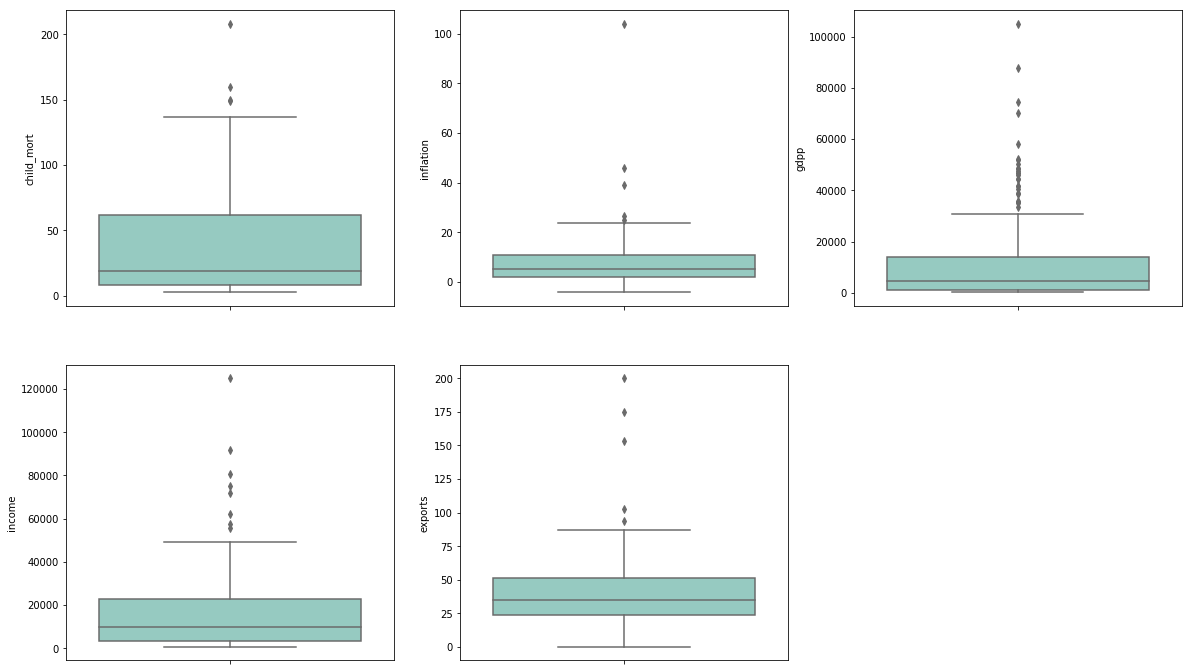

In [9]:
# Check the outliers in price column

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'child_mort', palette='Set3', data = country_data)
plt.subplot(4,3,2)
sns.boxplot(y = 'inflation', palette='Set3', data = country_data)
plt.subplot(4,3,3)
sns.boxplot(y = 'gdpp', palette='Set3', data = country_data)
plt.subplot(4,3,4)
sns.boxplot(y = 'income', palette='Set3', data = country_data)
plt.subplot(4,3,5)
sns.boxplot(y = 'exports', palette='Set3', data = country_data)
plt.show()

In [10]:
# Removing values beyond 99% for child mortality 

nn_quartile_child_mort = country_data['child_mort'].quantile(0.99)
country_data = country_data[country_data["child_mort"] < nn_quartile_child_mort]
country_data["child_mort"].describe(percentiles=[.25,.5,.75,.90,.95,.99]) 

count    165.000000
mean      36.503636
std       37.109339
min        2.600000
25%        7.900000
50%       19.200000
75%       58.800000
90%       95.880000
95%      113.400000
99%      141.320000
max      150.000000
Name: child_mort, dtype: float64

In [11]:
# Removing values beyond 98% for inflation 

nn_quartile_inflation = country_data['inflation'].quantile(0.98)
country_data = country_data[country_data["inflation"] < nn_quartile_inflation]
country_data["inflation"].describe(percentiles=[.25,.5,.75,.90,.95,.99]) 

count    161.000000
mean       6.592025
std        6.214069
min       -4.210000
25%        1.740000
50%        4.490000
75%        9.810000
90%       16.100000
95%       19.500000
99%       23.120000
max       24.900000
Name: inflation, dtype: float64

In [12]:
# Removing values beyond 98% for exports

nn_quartile_exports = country_data['exports'].quantile(0.98)
country_data = country_data[country_data["exports"] < nn_quartile_exports]
country_data["exports"].describe(percentiles=[.25,.5,.75,.90,.95,.99]) 

count    157.000000
mean      38.849675
std       19.806705
min        0.109000
25%       23.800000
50%       35.000000
75%       51.200000
90%       66.980000
95%       76.320000
99%       86.284000
max       93.800000
Name: exports, dtype: float64

In [13]:
# Removing values beyond 99% for income

nn_quartile_income = country_data['income'].quantile(0.99)
country_data = country_data[country_data["income"] < nn_quartile_income]
country_data["income"].describe(percentiles=[.25,.5,.75,.90,.95,.99]) 

count      155.000000
mean     15392.470968
std      15091.418791
min        609.000000
25%       3355.000000
50%       9940.000000
75%      21450.000000
90%      40160.000000
95%      44390.000000
99%      59762.000000
max      75200.000000
Name: income, dtype: float64

In [14]:
# Inspect the outlier values after removing outliers for 25%,50%,75%,90%,95% and above

country_data.describe(percentiles=[.25,.5,.75,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,37.104516,38.514187,6.835161,45.184941,15392.470968,6.667432,70.588387,2.945161,11708.858065
std,36.949533,19.708457,2.720911,18.906707,15091.418791,6.199257,8.330136,1.497734,16151.447418
min,2.600000,0.109000,1.970000,0.065900,609.000000,-4.210000,46.500000,1.230000,231.000000
25%,8.600000,23.800000,4.950000,30.750000,3355.000000,1.755000,65.300000,1.795000,1310.000000
50%,19.700000,35.000000,6.320000,43.300000,9940.000000,4.910000,73.100000,2.410000,4610.000000
75%,60.400000,50.650000,8.525000,57.800000,21450.000000,9.905000,76.650000,3.880000,12750.000000
99%,142.520000,86.306000,12.958000,96.464000,59762.000000,23.168000,82.092000,6.568400,65636.000000
max,150.000000,93.800000,17.900000,108.000000,75200.000000,24.900000,82.800000,7.490000,87800.000000


In [15]:
# The above data seems to be ok.

print(country_data.shape)

(155, 10)


In [16]:
# Determine the percentage of data retained

num_data = round(100*(len(country_data)/167),2)
print(num_data)

92.81


In [17]:
# removing the country column as it is not a continuous variable

df_without_country = country_data.drop(['country'], 1)

#### Scaling the data

In [18]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
country_data_normalized = standard_scaler.fit_transform(df_without_country)

In [19]:
# Create dataframe withe the normalized data

country_data_normalized = pd.DataFrame(country_data_normalized)
country_data_normalized.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
country_data_normalized.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.441631,-1.451489,0.274633,-0.015120,-0.916226,0.448692,-1.732868,1.925680,-0.692942
1,-0.556732,-0.535215,-0.105143,0.181212,-0.363132,-0.352379,0.687879,-0.867550,-0.473243
2,-0.266209,-0.005813,-0.982686,-0.731467,-0.165694,1.526496,0.711966,-0.036949,-0.450260
3,2.223599,1.210796,-1.469390,-0.121245,-0.631037,2.546042,-1.263171,2.153426,-0.508027
4,-0.727787,0.355607,-0.296875,0.727758,0.246468,-0.845969,0.748097,-0.546027,0.030507


### Step 3: Principle Component Analysis

In [20]:
#Importing the PCA module

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [21]:
#Applying PCA on the dataset

pca.fit(country_data_normalized)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [22]:
#Let's check the components

pca.components_

array([[-0.42945856,  0.17809252,  0.2311623 ,  0.04017807,  0.40829733,
        -0.22053821,  0.43662843, -0.41126408,  0.39200991],
       [-0.03823837,  0.63748588, -0.18492183,  0.70871797, -0.0926923 ,
        -0.04718509, -0.0712562 , -0.04605509, -0.1940503 ],
       [-0.12144612,  0.25931632, -0.59656691, -0.32051534,  0.19921145,
         0.6210116 ,  0.15188714, -0.10470033, -0.00335539],
       [ 0.37284123,  0.28766354,  0.23261435,  0.03356094,  0.43979788,
         0.186153  , -0.23749558,  0.43217413,  0.50174654],
       [-0.19300329, -0.07440133,  0.60990278,  0.1969369 , -0.13414891,
         0.70192596,  0.00832616, -0.113384  , -0.15108734],
       [ 0.06307349,  0.48161754,  0.26503585, -0.50080339, -0.05125252,
        -0.13205744, -0.46819838, -0.41140937, -0.185701  ],
       [-0.00238593, -0.40147095, -0.22900789,  0.3083485 ,  0.24047645,
         0.09026778, -0.58183765, -0.4887754 ,  0.21881118],
       [ 0.75726853,  0.00522357,  0.0201105 ,  0.06827816, -0

In [23]:
# The first 2 Principle Components :

colnames = list(country_data_normalized.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(9)

,PC1,PC2,Feature
0,-0.429459,-0.038238,child_mort
1,0.178093,0.637486,exports
2,0.231162,-0.184922,health
3,0.040178,0.708718,imports
4,0.408297,-0.092692,income
5,-0.220538,-0.047185,inflation
6,0.436628,-0.071256,life_expec
7,-0.411264,-0.046055,total_fer
8,0.392010,-0.194050,gdpp


Plot original features on the first 2 principal components as axes and analyse them

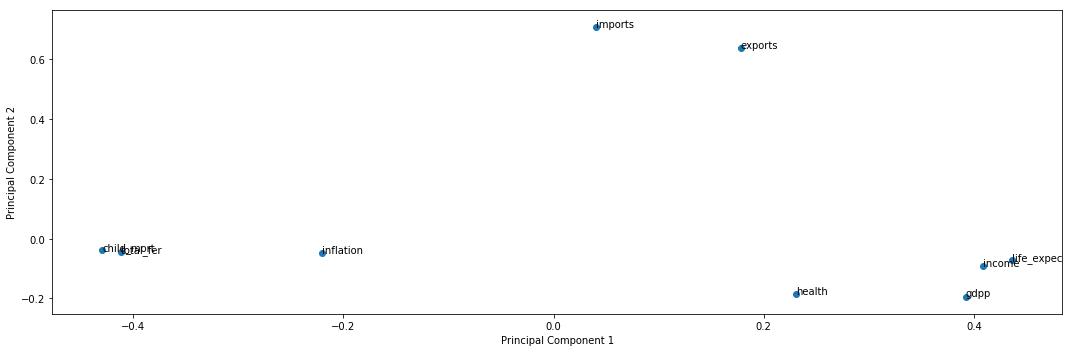

In [24]:
# scatterplot using the first 2 components for all features

%matplotlib inline
fig = plt.figure(figsize = (15,5))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

Based on the above scatter plot, 
 - Principle Component 2 defines more of imports and exports
 - Principle component 1 defines more of the rest of the components

In [25]:
# Principal Components capture maximum variance and are ordered
# Hence first let us see what is the variance given by the PCs

pca.explained_variance_ratio_.round(2)

array([0.47, 0.17, 0.14, 0.11, 0.06, 0.02, 0.02, 0.01, 0.01])

In [26]:
# display the variance of each variable

pca_df = pca.fit_transform(country_data_normalized)
df_verify = pd.DataFrame(pca_df, columns = colnames)
round(np.var(df_verify)/sum(np.var(df_verify)),2)

child_mort    0.47
exports       0.17
health        0.14
imports       0.11
income        0.06
inflation     0.02
life_expec    0.02
total_fer     0.01
gdpp          0.01
dtype: float64

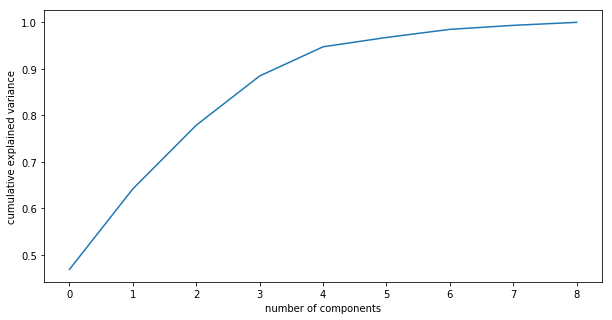

In [27]:
# Making the screeplot - plotting the cumulative variance against the number of components

%matplotlib inline
fig = plt.figure(figsize = (10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Based on the screeplot above, an approximate of 5 components can be used to define 95% variance. Hence we will go ahead with 5 components

In [28]:
# Using incremental PCA for efficiency

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [29]:
# Basis transformation - getting the data onto our principle components

country_data_pca = pca_final.fit_transform(country_data_normalized)
country_data_pca.shape

(155, 5)

In [30]:
# Creating a transpose so that the each column is properly arranged

pc = np.transpose(country_data_pca)
pc.shape

(5, 155)

In [31]:
# Creating correlation matrix for the principal components. There should be little or no correlation

corrmat = np.corrcoef(pc)

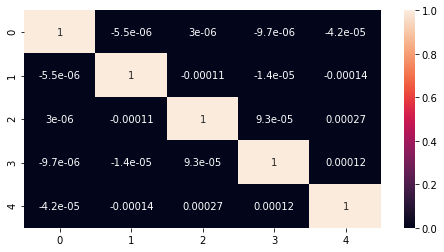

In [32]:
# plotting the correlation matrix

%matplotlib inline
plt.figure(figsize = (8,4))
sns.heatmap(corrmat,annot = True)
plt.show()

In [33]:
# Check the max and min correlation

corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.00026925464789896513 , min corr:  -0.00013525798947605058


From the above, since the max and min correelations are very close to 0, it can be inferred that there is no correlation 
between the principle components.

In [34]:
# converting the numpy array pc into a dataframe

country_data_after_pca = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})
country_data_after_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-3.107830,-0.808788,-1.078806,0.758356,0.300463
1,0.527814,-0.039060,-0.161491,-1.381141,0.092981
2,-0.397947,-0.348363,1.880647,-0.551901,0.486946
3,-3.539345,0.900306,1.999504,2.006402,0.263811
4,1.186951,0.807949,-0.181903,-0.661115,-0.486962


In [35]:
country_data_after_pca.shape

(155, 5)

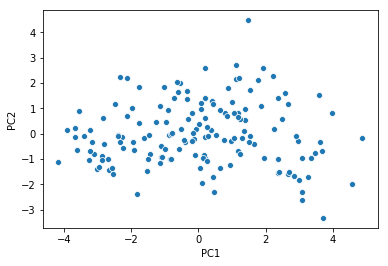

In [36]:
# Let us check if any clusters are visible for the first two principal components

sns.scatterplot(x='PC1',y='PC2', data=country_data_after_pca)
plt.show()

At this point, the clusters are not clearly visible. Hence shall proceed with clustering

### Step 4: Clustering - K Means

#### a)  Hopkins Statistics:
The Hopkins statistic, helps to determine as to how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [37]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [38]:
hopkins(country_data_after_pca)

0.7176951119753984

Since the hopkins statistics value is is > 0.5 the given dataset has a good tendency to form clusters.

#### b)  Silhouette Analysis:

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [39]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(country_data_after_pca)
    sse_.append([k, silhouette_score(country_data_after_pca, kmeans.labels_)])

In [40]:
print(sse_)

[[2, 0.29371279638583325], [3, 0.29471155884604555], [4, 0.2775216145886606], [5, 0.2697014666085896], [6, 0.2629061587620842], [7, 0.26553356443760645], [8, 0.2701224088232682], [9, 0.27447592087872963], [10, 0.2695726642019633], [11, 0.26005548337247775], [12, 0.2513102776491672], [13, 0.23690818060805657], [14, 0.23830427592653616]]


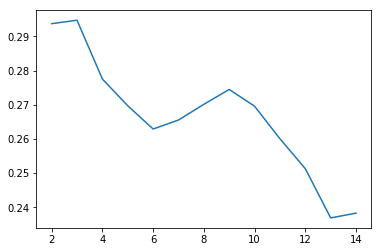

In [41]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

From the above analysis we find that 2 or 3 seem to be a good number of clusters for K means algorithm

#### c) Sum of Squared Distances (Elbow Curve Method):

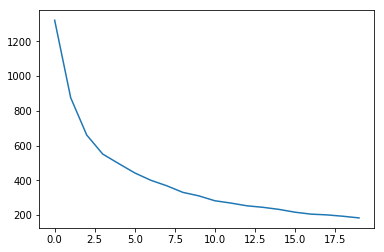

In [42]:
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(country_data_after_pca)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
plt.show()

In the above graph also, we see a bend bend at around 2 or 3 . Hence we will check for K = 2 and K = 3 valus.

#### d) K Means with different k values

From the above plots, we can determine that the K value can either take 2 or 3. Hence let us try with these both k values

In [43]:
# Kmeans with K=2

model_clus2 = KMeans(n_clusters = 2, max_iter=50, random_state=42)
model_clus2.fit(country_data_after_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [44]:
# Kmeans with K=3

model_clus3 = KMeans(n_clusters = 3, max_iter=50, random_state=42)
model_clus3.fit(country_data_after_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

#### e) Analyse the clusters with K Means = 2

In [45]:
country_data_2 = country_data_after_pca
country_data_2.index = pd.RangeIndex(len(country_data_2.index))
country_data_2_km = pd.concat([country_data_2, pd.Series(model_clus2.labels_)], axis=1)
country_data_2_km.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'clusterId']
country_data_2_km.head(10)

,PC1,PC2,PC3,PC4,PC5,clusterId
0,-3.107830,-0.808788,-1.078806,0.758356,0.300463,0
1,0.527814,-0.039060,-0.161491,-1.381141,0.092981,1
2,-0.397947,-0.348363,1.880647,-0.551901,0.486946,0
3,-3.539345,0.900306,1.999504,2.006402,0.263811,0
4,1.186951,0.807949,-0.181903,-0.661115,-0.486962,1
5,0.111379,-1.934988,1.644319,-0.293105,1.824034,1
6,-0.139852,-0.220916,0.495031,-1.588134,-0.009422,1
7,3.077738,-2.285390,-0.082755,0.744544,-0.737541,1
8,3.613258,-0.326805,-0.618599,1.232721,-0.026201,1
9,-0.192142,-0.288027,1.602653,-0.076198,0.398347,1


In [46]:
country_data_2_km['clusterId'].value_counts()

1    89
0    66
Name: clusterId, dtype: int64

#### f) Visualization on 2 Principle Components with K = 2
    - With two Principal Components (on the X-Y axes), plotting a scatter plot of all the countries and differentiating 
      the clusters.

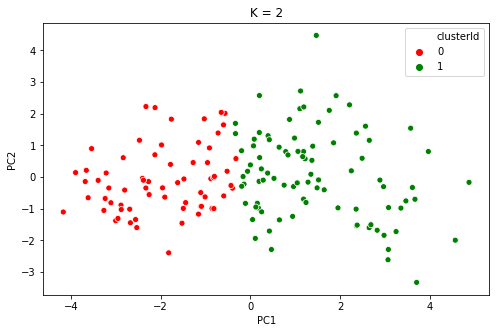

In [47]:
plt.figure(figsize = (8,5))
sns.scatterplot(x='PC1',y='PC2',hue='clusterId',legend='full', palette=['red','green'], data=country_data_2_km)
plt.title('K = 2')
plt.show()

#### g) Analyse the clusters with K Means = 3

In [48]:
country_data_3 = country_data_after_pca
country_data_3.index = pd.RangeIndex(len(country_data_3.index))
country_data_3_km = pd.concat([country_data_3, pd.Series(model_clus3.labels_)], axis=1)
country_data_3_km.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'clusterId']
country_data_3_km.head(10)

,PC1,PC2,PC3,PC4,PC5,clusterId
0,-3.107830,-0.808788,-1.078806,0.758356,0.300463,0
1,0.527814,-0.039060,-0.161491,-1.381141,0.092981,2
2,-0.397947,-0.348363,1.880647,-0.551901,0.486946,2
3,-3.539345,0.900306,1.999504,2.006402,0.263811,0
4,1.186951,0.807949,-0.181903,-0.661115,-0.486962,2
5,0.111379,-1.934988,1.644319,-0.293105,1.824034,2
6,-0.139852,-0.220916,0.495031,-1.588134,-0.009422,2
7,3.077738,-2.285390,-0.082755,0.744544,-0.737541,1
8,3.613258,-0.326805,-0.618599,1.232721,-0.026201,1
9,-0.192142,-0.288027,1.602653,-0.076198,0.398347,2


In [49]:
country_data_3_km['clusterId'].value_counts()

2    79
0    47
1    29
Name: clusterId, dtype: int64

#### h) Visualization on 2 Principle Components with K = 3
    - With two Principal Components (on the X-Y axes), plotting a scatter plot of all the countries and differentiating 
      the clusters.

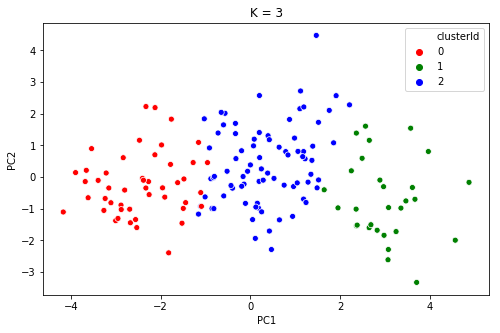

In [50]:
plt.figure(figsize = (8,5))
sns.scatterplot(x='PC1',y='PC2',hue='clusterId',legend='full', palette=['red','green','blue'], data=country_data_3_km)
plt.title('K = 3')
plt.show()

From the above 2 different scatter plots for k values 2 and 3 respectively, following can be inferred :
    - The scatter plot for K=3 is better than that of K=2 as K=3 shows a better seggregation of clusters
    - Business wise, if we take K=3, it would be easier to seggregate the countries under 3 cateories like, developed, 
      developing and underdeveloped countries.
        
Hence we will go ahead with value 3 for K for further analysis

In [51]:
# analysis of clusters formed for original variables with K=3

country_data.index = pd.RangeIndex(len(country_data.index))
country_data_km3 = pd.concat([country_data, pd.Series(model_clus3.labels_)], axis=1)
country_data_km3.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec',
                           'total_fer','gdpp', 'clusterId']

km_clusters_childmort = pd.DataFrame(country_data_km3.groupby(["clusterId"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(country_data_km3.groupby(["clusterId"]).exports.mean())
km_clusters_health = pd.DataFrame(country_data_km3.groupby(["clusterId"]).health.mean())
km_clusters_imports = pd.DataFrame(country_data_km3.groupby(["clusterId"]).imports.mean())
km_clusters_income = pd.DataFrame(country_data_km3.groupby(["clusterId"]).income.mean())
km_clusters_inflation = pd.DataFrame(country_data_km3.groupby(["clusterId"]).inflation.mean())
km_clusters_lifeexpec = pd.DataFrame(country_data_km3.groupby(["clusterId"]).life_expec.mean())
km_clusters_totalfer = pd.DataFrame(country_data_km3.groupby(["clusterId"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(country_data_km3.groupby(["clusterId"]).gdpp.mean())

In [52]:
original_country_data_km3 = pd.concat([pd.Series([0,1,2]), km_clusters_childmort, km_clusters_exports, km_clusters_health, 
                                           km_clusters_imports, km_clusters_income, km_clusters_inflation, km_clusters_lifeexpec,
                                           km_clusters_totalfer, km_clusters_gdpp], axis=1)
original_country_data_km3.columns = ["clusterId", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", 
                                         "income_mean", "inflation_mean", "life_expec_mean", "total_fer_mean", "gdpp_mean"]
original_country_data_km3.head()

,clusterId,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,85.770213,28.887213,6.027872,41.850338,3995.808511,9.689255,60.297872,4.806596,1851.680851
1,1,4.900000,42.865517,9.551379,40.013793,39910.344828,2.068379,80.193103,1.767931,41155.172414
2,2,19.973418,42.644304,6.318354,49.067089,13172.531646,6.557899,73.184810,2.269873,6763.848101


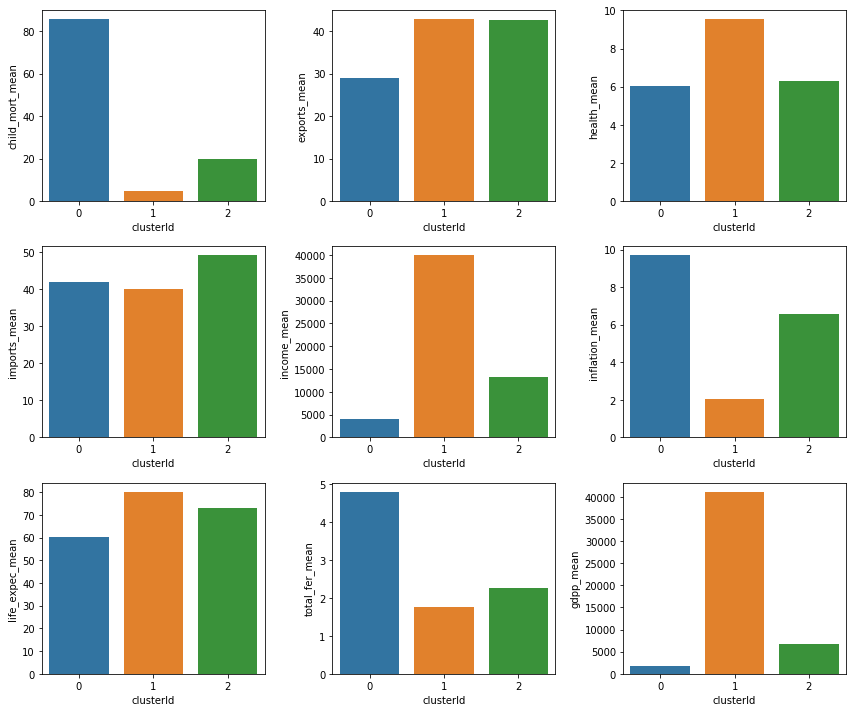

In [53]:
fig, axs = plt.subplots(3,3,figsize = (12,10))

sns.barplot(x=original_country_data_km3.clusterId, y=original_country_data_km3.child_mort_mean, ax = axs[0,0])
sns.barplot(x=original_country_data_km3.clusterId, y=original_country_data_km3.exports_mean, ax = axs[0,1])
sns.barplot(x=original_country_data_km3.clusterId, y=original_country_data_km3.health_mean, ax = axs[0,2])
sns.barplot(x=original_country_data_km3.clusterId, y=original_country_data_km3.imports_mean, ax = axs[1,0])
sns.barplot(x=original_country_data_km3.clusterId, y=original_country_data_km3.income_mean, ax = axs[1,1])
sns.barplot(x=original_country_data_km3.clusterId, y=original_country_data_km3.inflation_mean, ax = axs[1,2])
sns.barplot(x=original_country_data_km3.clusterId, y=original_country_data_km3.life_expec_mean, ax = axs[2,0])
sns.barplot(x=original_country_data_km3.clusterId, y=original_country_data_km3.total_fer_mean, ax = axs[2,1])
sns.barplot(x=original_country_data_km3.clusterId, y=original_country_data_km3.gdpp_mean, ax = axs[2,2])

plt.tight_layout()
plt.show()

#### i) Analysis for cluster which is in dire need of aid: <br>
    1) Based on the above clustering, 
        - countries grouped under cluster 0 are under-developed countries
        - countries grouped under cluster 1 are developed countries.
        - countries grouped under cluster 2 are developing countries.        
     
    2) From the above bar plots, it can be derived that,
        - For developed countries, exports, spending on health, income, life expectation and gdpp is very high as opposed to
          under developed countries for which all these variables are low.
        - For developed countries, child mortality rate, inflation, imports, total fertility are less as compared to that of
          underdeveloped countries
          
    3) For underdeveloped countries, the following fields required more attention
        - child_mortality
        - health
        - income
        - life_expectancy
        - gdpp
          
Hence, from the above plot, it can be determined that the following cluster 0 which are identified as under-developed countries are the ones that are in dire need of aid    

#### j) Visualisation on the clusters formed for original variables
    

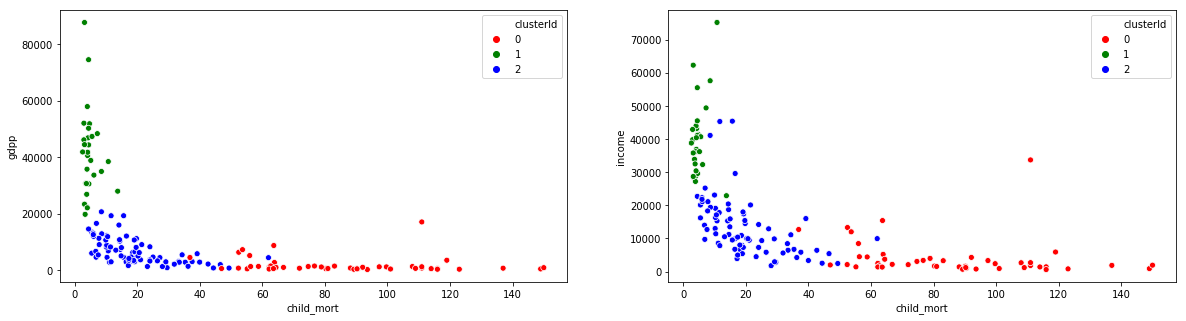

In [54]:
# Scatter plots of two principle component variables. 

f, (ax1, ax2) = plt.subplots(1,2, figsize = (20,5))

sns.scatterplot(x="child_mort", y="gdpp", hue="clusterId", data=country_data_km3, palette=['red','green','blue'], 
                   legend='full', ax = ax1)
sns.scatterplot(x="child_mort", y="income", hue="clusterId", data=country_data_km3, palette=['red','green','blue'], 
                   legend='full', ax = ax2)

plt.show()

In the above scatter plots :
    - cluster 0 represents under-developed countries
    - cluster 1 represents developed countries
    - cluster 2 represents developing countries

#### k) List of 5 Countries which which are in dire need of aid :


In [55]:
# list of countries filtered on the original data set based on high child mortality, low income and low gdpp. Have considered 
# these parameters as their mean in the clustering varies drastically amongst each other.


country_list = country_data_with_outlier[(country_data_with_outlier['child_mort'] > 86) &                           
                           (country_data_with_outlier['income'] < 3996) &                          
                           (country_data_with_outlier['gdpp'] < 1852)]                           
                                    
country_list = country_list.sort_values(by=['child_mort'], ascending=False)
country_list.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708


### Step 5: Clustering - Hierarchical

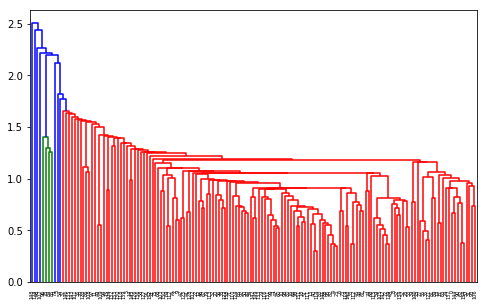

In [56]:
# heirarchical clustering with single linkage method

plt.figure(figsize = (8,5))
mergings = linkage(country_data_after_pca, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

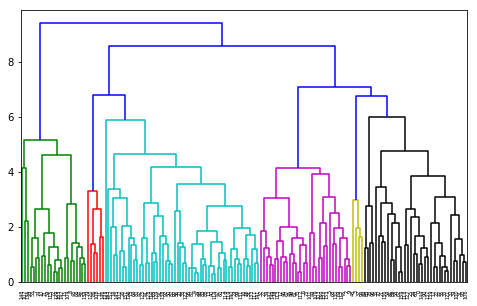

In [57]:
# heirarchical clustering with complete linkage method

plt.figure(figsize = (8,5))
mergings = linkage(country_data_after_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

From the above dendrogram using complete linkage method, we can cut the clusters from approximately point 7. Hence there 
would be 3 clusters for analysis formed from original variables

#### a) Visualization on 2 Principle Components with 3 clusters

In [58]:
clusterCut_3_hc = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
country_data_3_hc = pd.concat([country_data_after_pca, clusterCut_3_hc], axis=1)
country_data_3_hc.columns =  ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'clusterId']
country_data_3_hc.head(10)

,PC1,PC2,PC3,PC4,PC5,clusterId
0,-3.107830,-0.808788,-1.078806,0.758356,0.300463,0
1,0.527814,-0.039060,-0.161491,-1.381141,0.092981,1
2,-0.397947,-0.348363,1.880647,-0.551901,0.486946,0
3,-3.539345,0.900306,1.999504,2.006402,0.263811,0
4,1.186951,0.807949,-0.181903,-0.661115,-0.486962,1
5,0.111379,-1.934988,1.644319,-0.293105,1.824034,0
6,-0.139852,-0.220916,0.495031,-1.588134,-0.009422,0
7,3.077738,-2.285390,-0.082755,0.744544,-0.737541,2
8,3.613258,-0.326805,-0.618599,1.232721,-0.026201,2
9,-0.192142,-0.288027,1.602653,-0.076198,0.398347,0


In [59]:
country_data_3_hc['clusterId'].value_counts()

0    72
1    60
2    23
Name: clusterId, dtype: int64

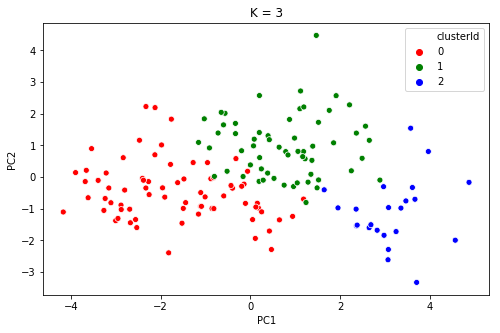

In [60]:
plt.figure(figsize = (8,5))
sns.scatterplot(x='PC1',y='PC2',hue='clusterId',legend='full', palette=['red','green','blue'], data=country_data_3_hc)
plt.title('K = 3')
plt.show()

In [61]:
# With 3 Clusters :

clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
country_data_hc = pd.concat([country_data, clusterCut], axis=1)
country_data_hc.columns =  ['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec',
                           'total_fer','gdpp', 'clusterId']


hc_clusters_childmort = pd.DataFrame(country_data_hc.groupby(["clusterId"]).child_mort.mean())
hc_clusters_exports = pd.DataFrame(country_data_hc.groupby(["clusterId"]).exports.mean())
hc_clusters_health = pd.DataFrame(country_data_hc.groupby(["clusterId"]).health.mean())
hc_clusters_imports = pd.DataFrame(country_data_hc.groupby(["clusterId"]).imports.mean())
hc_clusters_income = pd.DataFrame(country_data_hc.groupby(["clusterId"]).income.mean())
hc_clusters_inflation = pd.DataFrame(country_data_hc.groupby(["clusterId"]).inflation.mean())
hc_clusters_lifeexpec = pd.DataFrame(country_data_hc.groupby(["clusterId"]).life_expec.mean())
hc_clusters_totalfer = pd.DataFrame(country_data_hc.groupby(["clusterId"]).total_fer.mean())
hc_clusters_gdpp = pd.DataFrame(country_data_hc.groupby(["clusterId"]).gdpp.mean())

In [62]:
original_country_data_hc = pd.concat([pd.Series([0,1,2]), hc_clusters_childmort, hc_clusters_exports, hc_clusters_health, 
                                           hc_clusters_imports, hc_clusters_income, hc_clusters_inflation, hc_clusters_lifeexpec,
                                           hc_clusters_totalfer, hc_clusters_gdpp], axis=1)
original_country_data_hc.columns = ["clusterId", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", 
                                    "income_mean", "inflation_mean", "life_expec_mean", "total_fer_mean", "gdpp_mean"]
original_country_data_hc.head()

,clusterId,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,64.287500,28.129153,5.999722,37.192582,6620.458333,10.032014,64.948611,3.949028,3190.791667
1,1,16.901667,51.260000,6.449333,58.148333,16764.333333,4.626950,73.516667,2.178500,9353.933333
2,2,4.713043,37.773913,10.456957,36.386957,39273.913043,1.457826,80.604348,1.802609,44517.391304


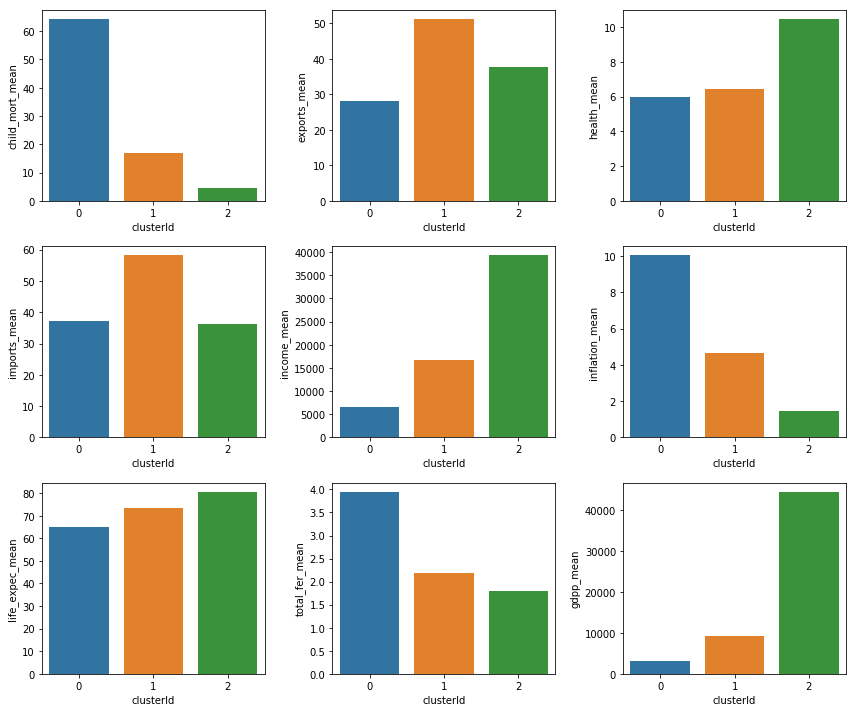

In [63]:
fig, axs = plt.subplots(3,3,figsize = (12,10))

sns.barplot(x=original_country_data_hc.clusterId, y=original_country_data_hc.child_mort_mean, ax = axs[0,0])
sns.barplot(x=original_country_data_hc.clusterId, y=original_country_data_hc.exports_mean, ax = axs[0,1])
sns.barplot(x=original_country_data_hc.clusterId, y=original_country_data_hc.health_mean, ax = axs[0,2])
sns.barplot(x=original_country_data_hc.clusterId, y=original_country_data_hc.imports_mean, ax = axs[1,0])
sns.barplot(x=original_country_data_hc.clusterId, y=original_country_data_hc.income_mean, ax = axs[1,1])
sns.barplot(x=original_country_data_hc.clusterId, y=original_country_data_hc.inflation_mean, ax = axs[1,2])
sns.barplot(x=original_country_data_hc.clusterId, y=original_country_data_hc.life_expec_mean, ax = axs[2,0])
sns.barplot(x=original_country_data_hc.clusterId, y=original_country_data_hc.total_fer_mean, ax = axs[2,1])
sns.barplot(x=original_country_data_hc.clusterId, y=original_country_data_hc.gdpp_mean, ax = axs[2,2])

plt.tight_layout()
plt.show()

#### b) Analysis for cluster which is in dire need of aid: <br>
    1) Based on the above clustering, 
        - countries grouped under cluster 0 are under-developed countries
        - countries grouped under cluster 1 are developing countries
        - countries grouped under cluster 2 are developed countries.
     
    2) From the above bar plots, it can be derived that,
        - For developed countries, exports, spending on health, income, life expectancy and gdpp is very high as opposed to
          under developed countries for which all these variables are low.
        - For developed countries, child mortality rate, inflation, imports, total fertility are less as compared to that of
          underdeveloped countries  
          
    3) For underdeveloped countries, the following fields required more attention
        - child_mortality
        - health
        - income
        - life_expectancy
        - gdpp
          
Hence, from the above plot, it can be determined that the following cluster 0 which are identified as under-developed countries are the ones that are in dire need of aid   

#### c) Visualisation on the clusters formed on original components    

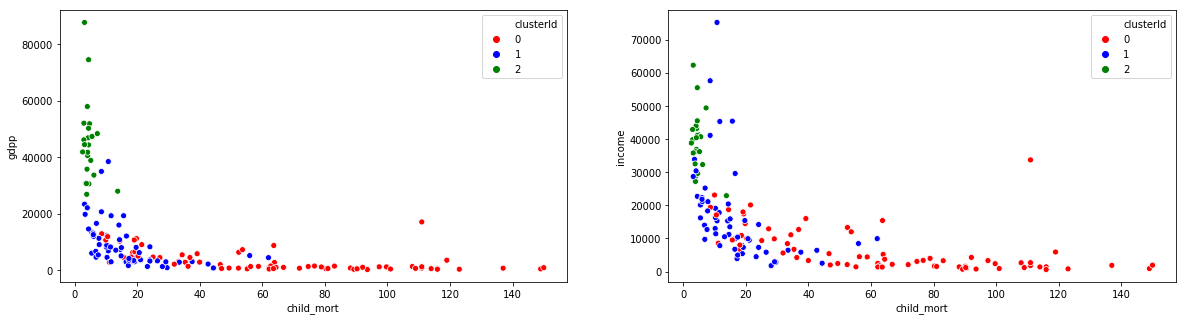

In [64]:
# Scatter plots of two principle component variables

f, (ax1, ax2) = plt.subplots(1,2, figsize = (20,5))

sns.scatterplot(x="child_mort", y="gdpp", hue="clusterId", data=country_data_hc, palette=['red','blue','green'], 
                   legend='full', ax = ax1)
sns.scatterplot(x="child_mort", y="income", hue="clusterId", data=country_data_hc, palette=['red','blue','green'], 
                   legend='full', ax = ax2)

plt.show()

#### d) List of 5 Countries which which are in dire need of aid :

In [65]:
# list of countries filtered on the original data set based on high child mortality, low income and low gdpp. Have considered 
# these parameters as their mean in the clustering varies drastically amongst each other.

country_list_hc = country_data_hc[(country_data_hc['child_mort'] > 64) &
                           (country_data_hc['income'] < 6620) &
                           (country_data_hc['gdpp'] < 3191) ]

country_list_hc = country_list_hc.sort_values(by=['child_mort'], ascending=False)
country_list_hc.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterId
31,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,0
30,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,0
93,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,0
106,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,0
24,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575,0


### Step 6: Conclusion based on K Means clustering :

    - The Hierarchical clustering did not seem to be as intuitive as K-Means and hence K-Means Clustering was preferred. 
    - Following are the top 5 under developed countries based on the high child mortality rate, low spend on health and 
       low income of the countries population.
        - Haiti
        - Sierra Leone
        - Chad
        - Central African Republic
        - Mali
        
    Hence the recommendation would be to focus more on the above countries    
    